In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
db = pd.read_csv('data/player_stats_injuries.csv')

db.head()


,PLAYER_ID,PLAYER_NAME,SEASON,SEASON_NUM,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,GP,MIN,USG_PCT,...,AVG_SEC_PER_TOUCH,AVG_DRIB_PER_TOUCH,ELBOW_TOUCHES,POST_TOUCHES,PAINT_TOUCHES,TEAM,INJURED ON,RETURNED,DAYS MISSED,INJURED_TYPE
0,1630639,A.J. Lawson,22-23,22.5,22.0,78,179,13,4.8,0.182,...,1.39,0.62,0.0,0.0,0.2,NaN,NaN,NaN,NaN,NaN
1,1631260,AJ Green,22-23,22.5,23.0,77,190,32,9.4,0.160,...,2.61,1.84,0.1,0.0,0.3,NaN,NaN,NaN,NaN,NaN
2,1631100,AJ Griffin,22-23,22.5,19.0,78,220,66,19.4,0.174,...,2.08,1.49,0.4,0.0,0.7,NaN,NaN,NaN,NaN,NaN
3,203932,Aaron Gordon,22-23,22.5,27.0,80,235,61,30.1,0.206,...,2.94,2.11,1.8,2.1,6.8,Nuggets,2023-02-02,2023-02-07,5.0,Sprained_ankle
4,1628988,Aaron Holiday,22-23,22.5,26.0,72,185,57,13.7,0.128,...,4.17,3.82,0.1,0.0,0.4,NaN,NaN,NaN,NaN,NaN


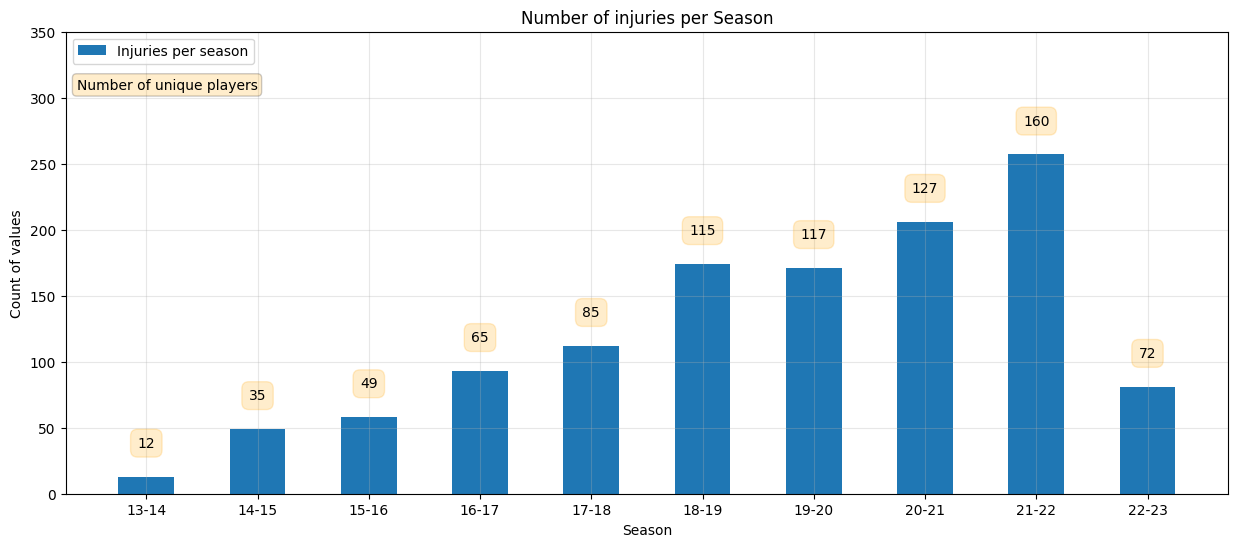

In [17]:
season_counts = db[db['INJURED_TYPE'].notna()].groupby('SEASON').agg(count=('SEASON', 'size'), unique_players=('PLAYER_ID', 'nunique')).reset_index()
season_counts = season_counts.sort_values(by='SEASON')

plt.figure(figsize=(15, 6))
plt.bar(season_counts['SEASON'], season_counts['count'], label='Data points per season', width=0.5)

for i, row in season_counts.iterrows():
    plt.text(row['SEASON'], row['count'] + 20, 
             f'{row["unique_players"]}', 
             ha='center', 
             va='bottom', 
             fontsize=10, 
             bbox=dict(facecolor='orange', alpha=0.2, edgecolor='orange', boxstyle='round,pad=0.5'))

plt.title('Number of injuries per Season')
plt.xlabel('Season')
plt.ylabel('Count of values')
plt.ylim(0, 350)
plt.grid(True, alpha=0.3)
plt.legend(['Injuries per season'], loc='upper left')
props = dict(boxstyle='round', facecolor='orange', alpha=0.2)
plt.gca().text(0.165, 0.9, "Number of unique players", transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)
plt.show()


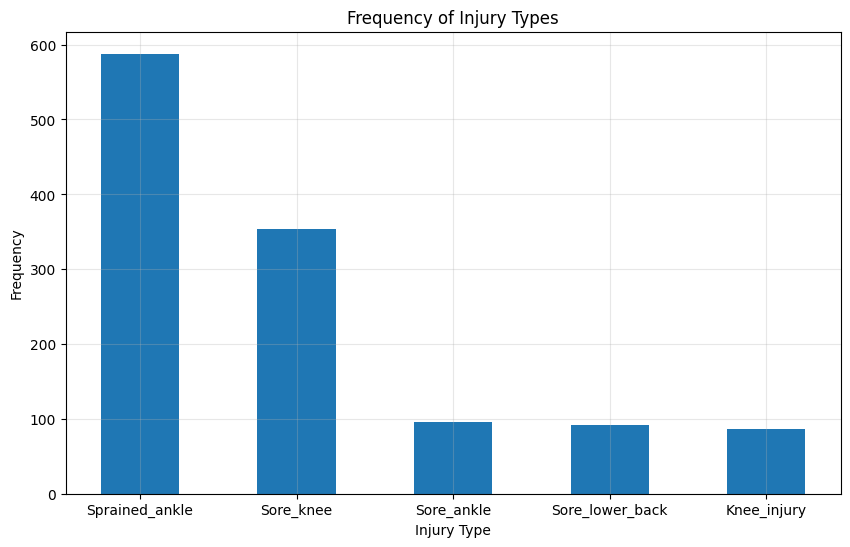

In [18]:
injury_type_counts = db['INJURED_TYPE'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(injury_type_counts.index, injury_type_counts.values, width=0.5)
plt.title('Frequency of Injury Types')
plt.xlabel('Injury Type')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


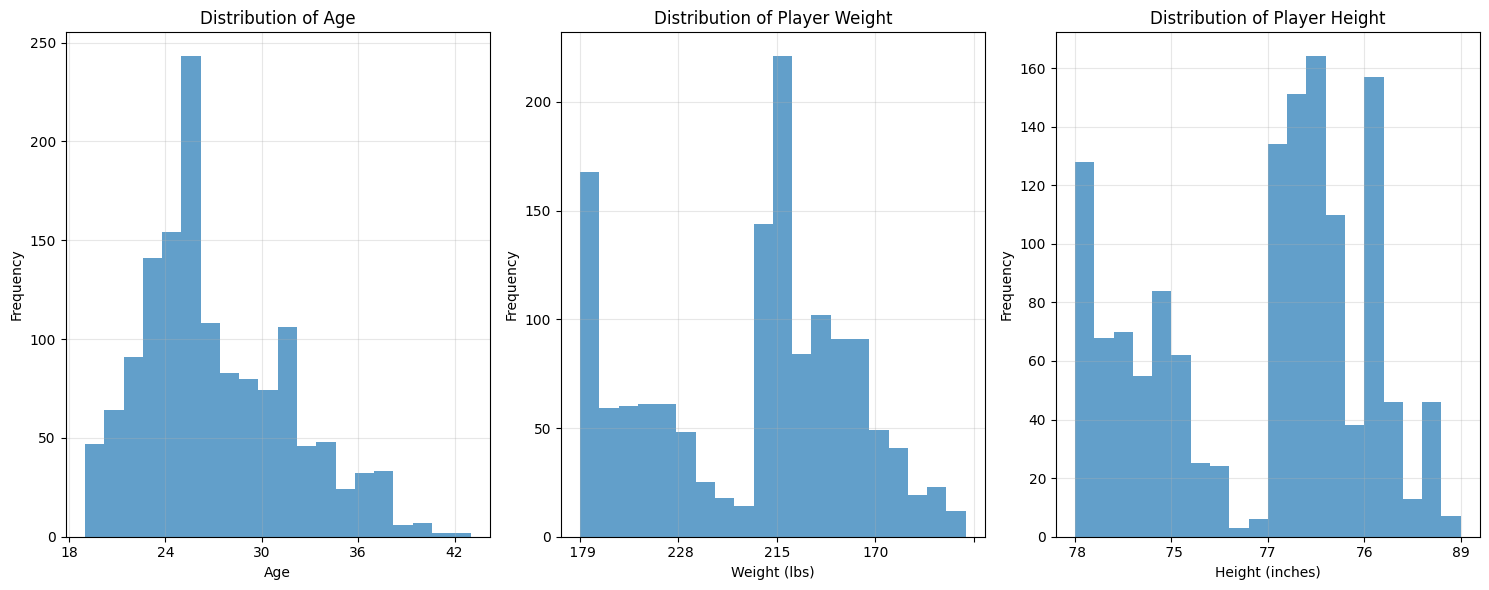

In [19]:
unique_players = db.drop_duplicates(subset='PLAYER_ID')

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

data = [
    (unique_players['AGE'].dropna(), 'Distribution of Age', 'Age'),
    (unique_players['PLAYER_WEIGHT'].dropna(), 'Distribution of Player Weight', 'Weight (lbs)'),
    (unique_players['PLAYER_HEIGHT_INCHES'].dropna(), 'Distribution of Player Height', 'Height (inches)')
]

for ax, (data_series, title, xlabel) in zip(axes, data):
    ax.hist(data_series, bins=20, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.tight_layout()
plt.show()


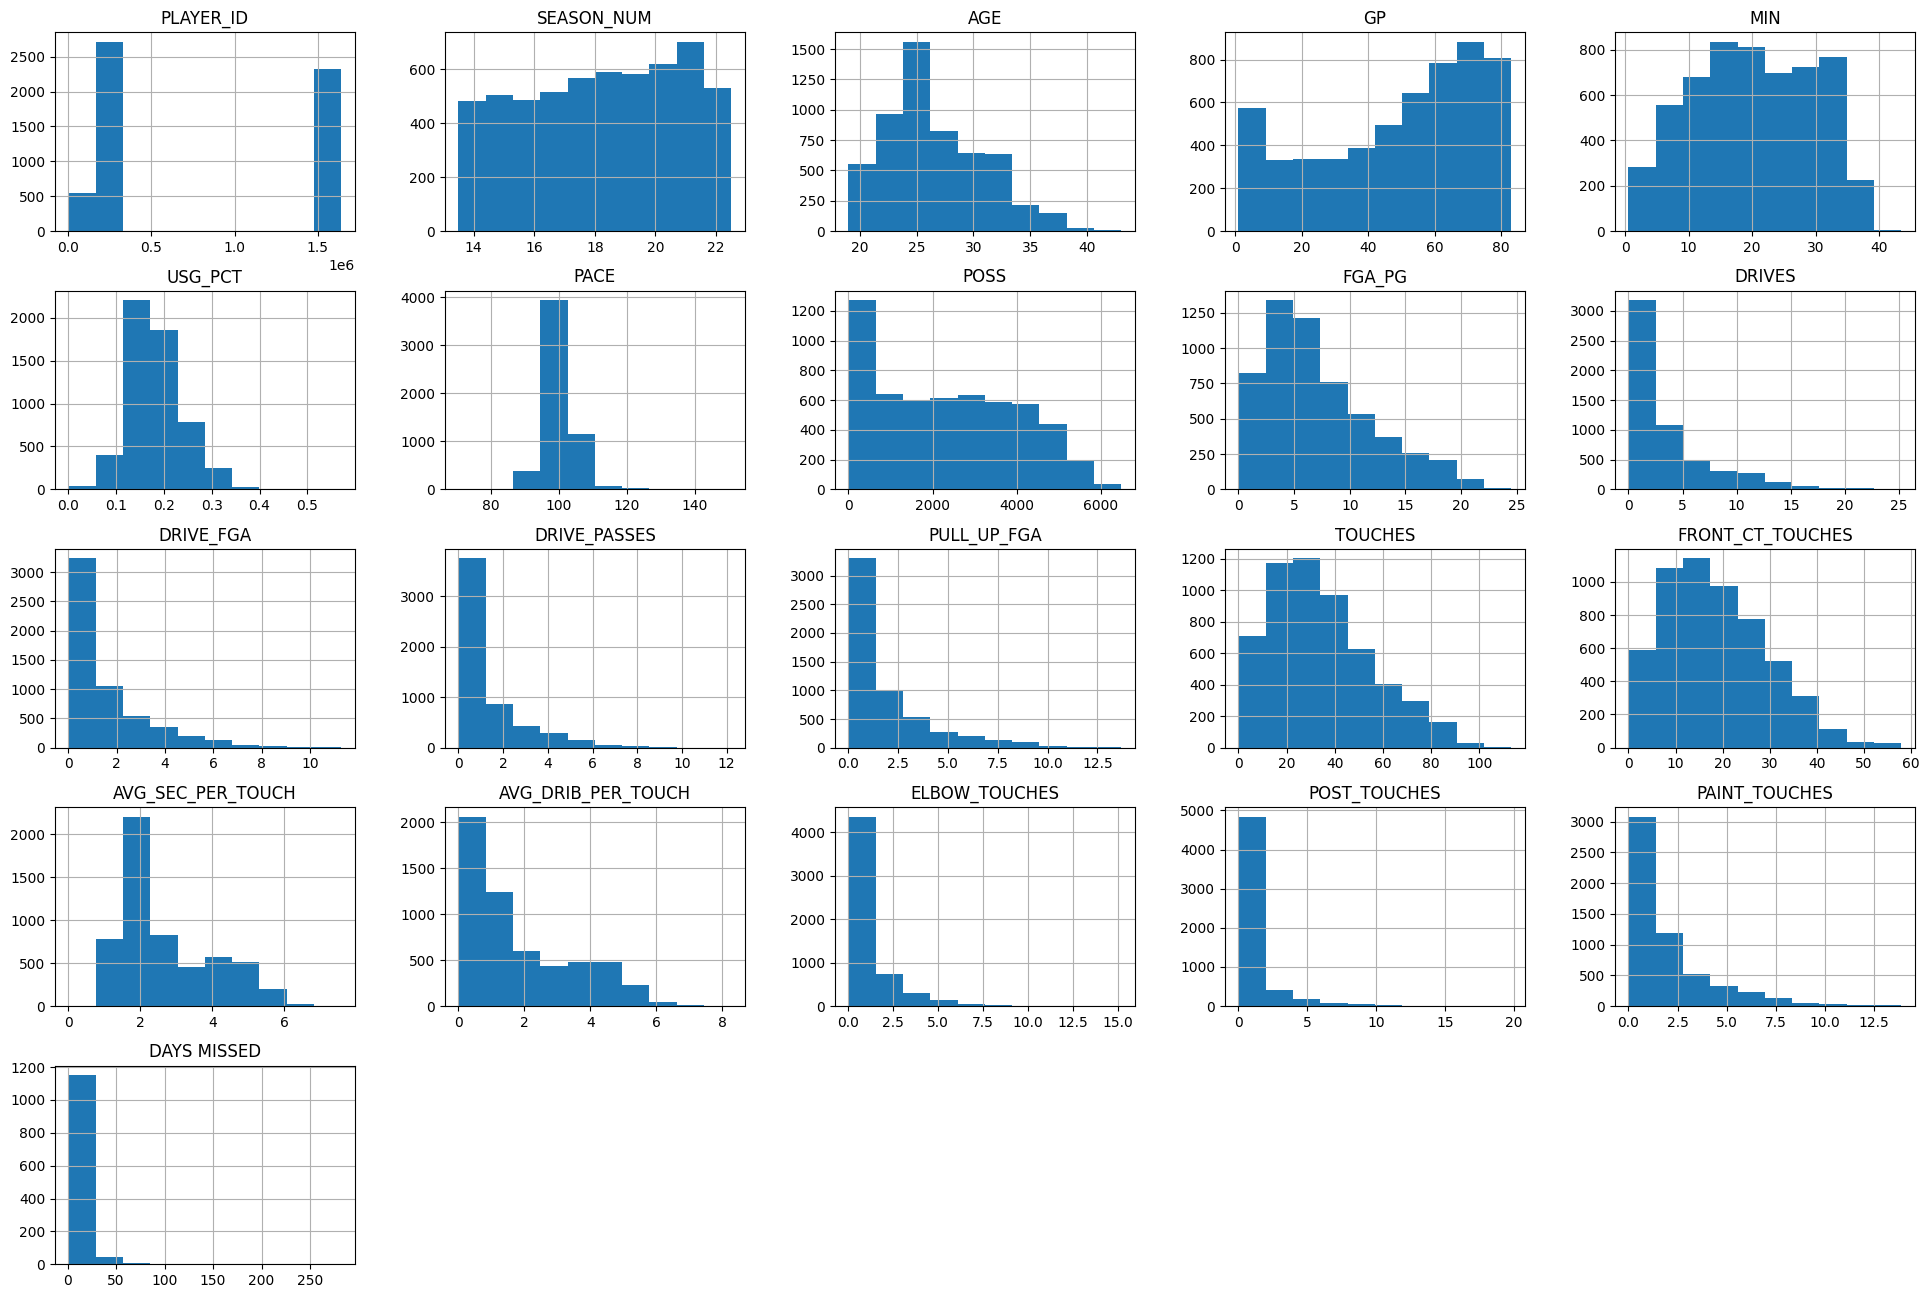

In [20]:
db.hist(figsize=(24, 16))

plt.xlabel('X-axis Label', fontsize=12)
plt.ylabel('Y-axis Label', fontsize=12)

plt.show()

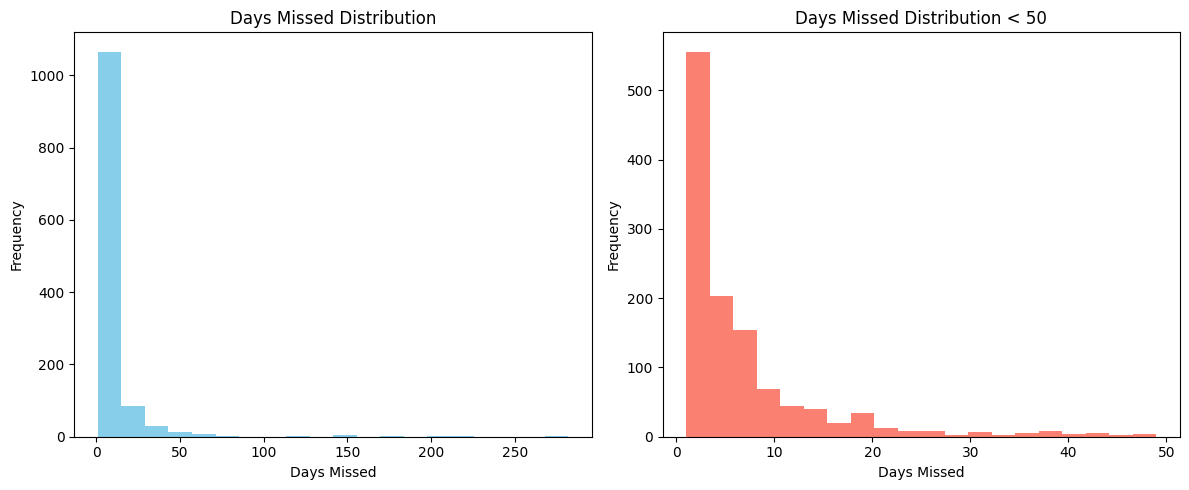

In [33]:
data1 = db['DAYS MISSED'].dropna()
data2 = data1[db['DAYS MISSED']< 50]

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First histogram
axes[0].hist(data1, bins=20, color='skyblue')
axes[0].set_title('Days Missed Distribution')
axes[0].set_xlabel('Days Missed')
axes[0].set_ylabel('Frequency')

# Second histogram
axes[1].hist(data2, bins=20, color='salmon')
axes[1].set_title('Days Missed Distribution < 50')
axes[1].set_xlabel('Days Missed')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()
